In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

In [2]:
train_df_bi = pd.read_csv('../data/train_fp_bI.csv')
test_df_bi = pd.read_csv('../data/test_fp_bI.csv')

In [3]:
train_df = pd.read_csv('../data/train_fp.csv')
test_df = pd.read_csv('../data/test_fp.csv')

In [ ]:
# Calculate frequency of appearance of FPs
train_fps_freq = train_df.sum()[1:-1]
train_fps_freq = train_fps_freq / train_fps_freq.sum()

test_fps_freq = test_df.sum()[1:-1]
test_fps_freq = test_fps_freq / test_fps_freq.sum()

<Axes: >

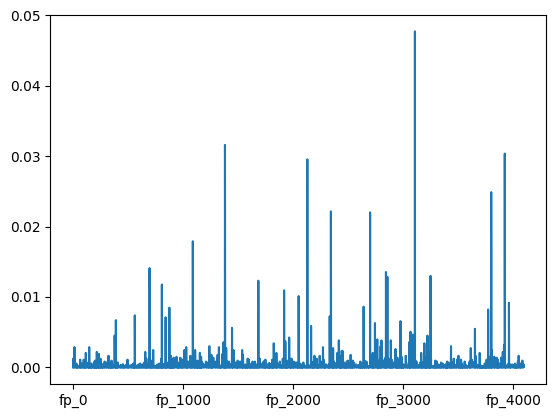

In [12]:
train_fps_freq.plot(kind='line')

<Axes: >

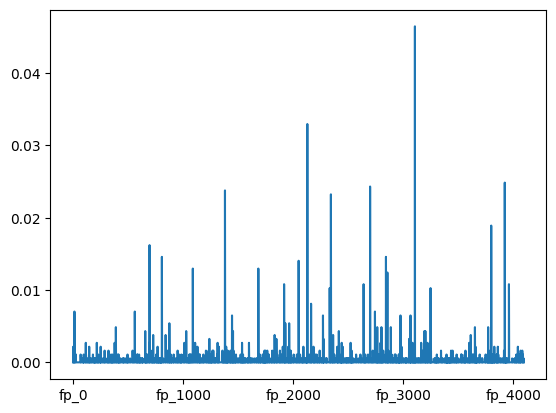

In [13]:
test_fps_freq.plot(kind='line')

In [15]:
import numpy as np
from scipy.stats import wasserstein_distance, entropy
from scipy.spatial.distance import cosine

def compare_fingerprint_distributions(dist1, dist2):
    """
    Compare two frequency distributions using multiple similarity metrics.
    
    Parameters:
    dist1, dist2 (array-like): Arrays of equal length containing frequency values
    
    Returns:
    dict: Dictionary containing different similarity/distance metrics
    """
    # Convert inputs to numpy arrays and normalize if not already normalized
    dist1 = np.array(dist1, dtype=float)
    dist2 = np.array(dist2, dtype=float)
    
    if np.sum(dist1) != 1:
        dist1 = dist1 / np.sum(dist1)
    if np.sum(dist2) != 1:
        dist2 = dist2 / np.sum(dist2)
    
    results = {}
    
    # Cosine similarity (1 means identical, 0 means completely different)
    results['cosine_similarity'] = 1 - cosine(dist1, dist2)
    
    # Earth Mover's Distance (Wasserstein) - smaller values mean more similar
    results['wasserstein_distance'] = wasserstein_distance(np.arange(len(dist1)), 
                                                         np.arange(len(dist2)), 
                                                         dist1, dist2)
    
    # Jensen-Shannon Divergence (0 means identical, 1 means completely different)
    m = 0.5 * (dist1 + dist2)
    results['jensen_shannon'] = 0.5 * (
        entropy(dist1, m, base=2) + 
        entropy(dist2, m, base=2)
    )
    
    # Bhattacharyya coefficient (1 means identical, 0 means completely different)
    results['bhattacharyya_coef'] = np.sum(np.sqrt(dist1 * dist2))
    
    # Hellinger distance (0 means identical, 1 means completely different)
    results['hellinger_distance'] = np.sqrt(1 - results['bhattacharyya_coef'])
    
    return results


results = compare_fingerprint_distributions(train_fps_freq, test_fps_freq)

for metric, value in results.items():
    print(f"{metric}: {value:.4f}")

cosine_similarity: 0.9658
wasserstein_distance: 38.1324
jensen_shannon: 0.1843
bhattacharyya_coef: 0.8284
hellinger_distance: 0.4143
